# Exploratory Data Analysis of Cars.csv

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import grafici

In [3]:
cars = pd.read_csv('Cleaned_Data/cars.csv')

In [4]:
cars['release_date'] = pd.to_datetime(cars['release_date'])

<Axes: xlabel='fuel_type'>

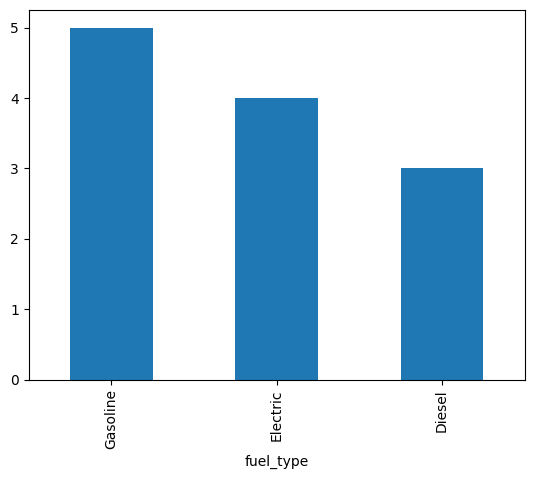

In [5]:
# plot the fuel_type distribution
cars['fuel_type'].value_counts().plot(kind='bar')

<Axes: xlabel='release_date'>

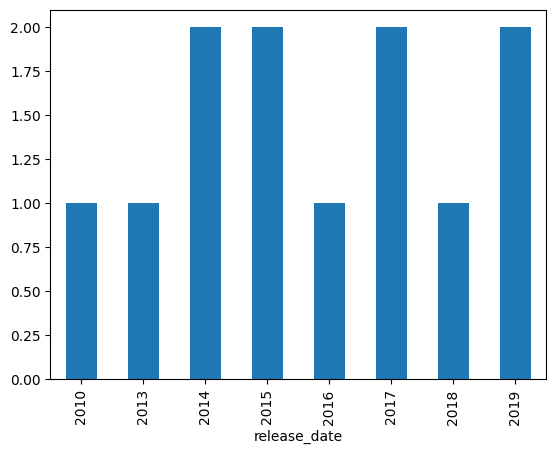

In [6]:
# plot the release_date grouped by year
cars['release_date'].dt.year.value_counts().sort_index().plot(kind='bar')